In [15]:
%load_ext autoreload
%autoreload 2

import torch as t
import torch_geometric as ptgeo
import matplotlib.pyplot as plt

from gninvert.rule_discovery import *
from gninvert.gns import *
from gninvert.gnns import *
from gninvert.hyperparamsearch import *

from gninvert.graph_compare import model_compare

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
diff_gn1 = SingleDiffusionGN(
    diffusion_constant=0.1
)
diff_gn2 = MultiDiffusionGN(
    diffusion_constants=[0.1, 0.1]
)
act_inh_gn_simple = ActivatorInhibitorGN(
    act_diff_const = 0.1,
    inh_diff_const = 0.05,
    growth_const = 0.05
)
act_inh_gn_full = FullActInhGN(
    spatial_const = 10,
    temporal_const=0.01,
    growth_alpha=10,
    growth_rho=1,
    growth_scale=0.05,
    reaction_const=0.2,
    reference_conc=2
)

TRAINING
Number of node features: 3
Defaulting to 3 message features
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

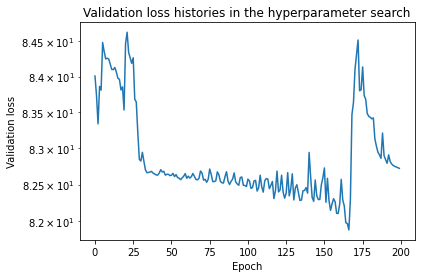

In [10]:
test = invert_gn(act_inh_gn_simple, models_per_hp_setting=1, save_to_file=False)

TRAINING
Number of node features: 3
Defaulting to 3 message features
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Saved model results list to runs/delete/hpsearch
Saved model with lowest validation loss to runs/delete/model


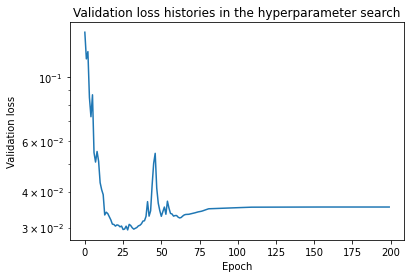

In [11]:
test2 = invert_gn(act_inh_gn_simple, models_per_hp_setting=1,
                  run_name="delete",
                  graphs_in_training_data=4,
                  training_graph_size=100)

TRAINING
Number of node features: 3
Every hyperparameter setting is a list of options. Running hyperparameter search ...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

GNN_full()

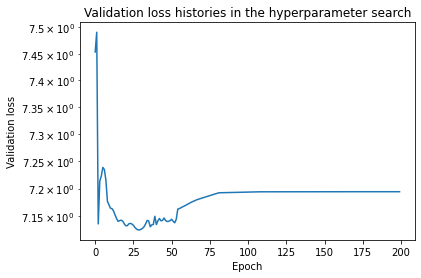

In [33]:
invert_gn(act_inh_gn_simple, graphs_in_training_data=4, training_graph_size=100,
          save_to_file=False,
          hyperparam_settings = {
            # selected as important by decision tree on big hpsearch:
            'loss_func': [t.nn.MSELoss()],
            'optimizer': ['adam'],
            'regularization_coefficient': [False],
            # other hyperparams:
            'starting_lr': [0.1],
            'lr_scheduler_dec_factor': [0.1],
            'lr_scheduler_patience': [25],
            'lr_scheduler_cooldown': [1],
            'batch_size': [2],
            'adam_weight_decay': [1e-6],

            # how patient are you?
            'epochs': [200],
            
            # ARGS TO gnn (in order):
            1: [3],       # node_features
            2: [2],       # message_featuers
            3: [[16,16]],       # (message_)hidden_sizes
            4: [t.nn.GELU],  # (message_)nonlinearity
            5: [True]        # (message_)end_with_nonlinearity
        })

In [76]:
hps1 = {
    'loss_func': [t.nn.L1Loss()],
    'optimizer': ['adam'],
    'regularization_coefficient': [1e-5],
    'regularization_norm': [1],
    'starting_lr': [0.1],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [25],
    'lr_scheduler_cooldown': [1],
    'batch_size': [2],
    'adam_weight_decay': [1e-6],
    'epochs': [200],
    1: [3],
    2: [2],
    3: [[14,14,14]],
    4: [t.nn.GELU],
    5: [True]
}

hps2={
    # selected as important by decision tree on big hpsearch:
    'loss_func': [t.nn.L1Loss()],
    'optimizer': ['adam'],
    'regularization_coefficient': [1e-5],
    'regularization_norm': [1],
    # other hyperparams:
    'starting_lr': [0.1],
    'lr_scheduler_dec_factor': [0.1],
    'lr_scheduler_patience': [25],
    'lr_scheduler_cooldown': [1],
    'batch_size': [2],
    'adam_weight_decay': [1e-6],

            # how patient are you?
    'epochs': [200],
            
            # ARGS TO gnn (in order):
    1: [3],       # node_features
    2: [2],       # message_featuers
    3: [[14,14,14]],       # (message_)hidden_sizes
    4: [t.nn.GELU],  # (message_)nonlinearity
    5: [True]        # (message_)end_with_nonlinearity
}

TRAINING
Number of node features: 3
Every hyperparameter setting is a list of options. Running hyperparameter search ...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

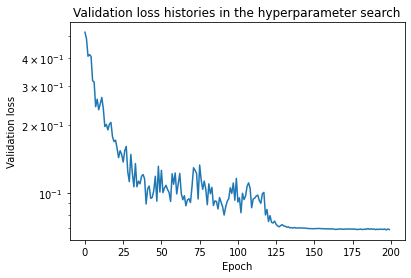

In [77]:
test3 = invert_gn(act_inh_gn_simple, models_per_hp_setting=1,
                  run_name="delete7",
                  nn_constructor=GNN_full,
                  hyperparam_settings = hps2,
                  graphs_in_training_data=4,
                  training_graph_size=100,
                 save_to_file=False)

TRAINING
Number of node features: 1
Defaulting to 1 message features
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Saved model results list to runs/testing/hpsearch
Saved model with lowest validation loss to runs/testing/model
INVERTING


/home/lrudl/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pysr/sr.py:567: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
┌ Warning: Replacing module `Parsers`
└ @ Base loading.jl:1036
┌ Warning: Replacing module `MacroTools`
└ @ Base loading.jl:1036
/home/lrudl/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pysr/sr.py:567: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


RecoveredGN()

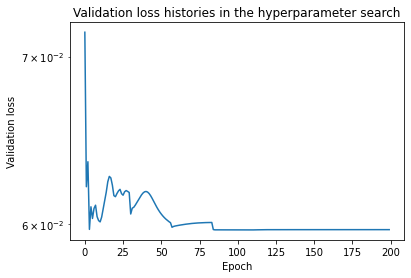

In [5]:
invert_gn(diff_gn1, models_per_hp_setting=1, run_name="testing")

In [6]:
t.load('runs/testing/model')

GNN_full()

TRAINING
Number of node features: 1
Defaulting to 1 message features
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saved model results list to runs/gninversion_2022-04-02_14:30:03/hpsearch
Saved model with lowest validation loss to runs/gninversion_2022-04-02_14:30:03/model
INVERTING
Started!

Cycles per second: 3.660e+02
Head worker occupation: 0.0%
Progress: 2 / 500 total iterations (0.400%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.371e-03  -1.670e-08  -0.06995112
5           6.853e-05  9.739e-01  ((xs - 0.87753975) * 0.1957831)
9           6.853e-05  7.728e-08  (((xt / xt) - (xs + 0.12246112)) * -0.19578338)
11          6.853e-05  5.435e-08  ((((xt / xt) - (xs + 0.12251387)) * -0.19578747) - 8.130133e-6)

Press 'q' and then <enter> to stop execution early.

Cycles per second: 4.060e+03
Head worker occupation: 0.5%
Progress: 42 / 500 total iterations (8.400%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           3.371e-03  -1.670e-08  -0.06995112
5           6.853e-05  9.

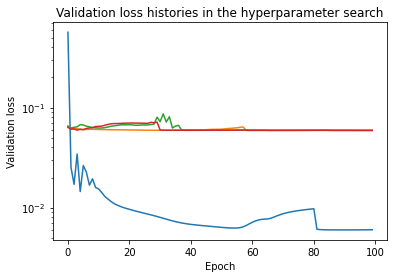

In [7]:
s1 = invert_gn(diff_gn1, models_per_hp_setting=4)

In [36]:
(s1[0].equation, s1[1].equation)

('((xs * 0.19578326) + -0.17180791)', '((a * 0.4688713) + 0.49155492)')

In [37]:
eqgn1 = EquationGN(s1[0].lambda_format, s1[1].lambda_format)

TRAINING
Number of node features: 2
Defaulting to 2 message features
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Saved model results list to runs/gninversion_2022-04-02_14:34:48/hpsearch
Saved model with lowest validation loss to runs/gninversion_2022-04-02_14:34:48/model
INVERTING


/home/lrudl/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pysr/sr.py:567: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/lrudl/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pysr/sr.py:567: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


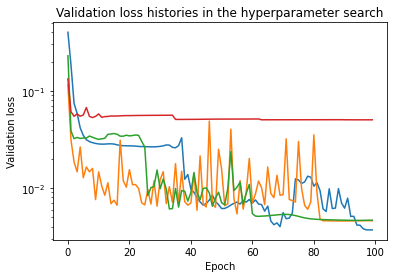

In [10]:
s2 = invert_gn(diff_gn2, models_per_hp_setting=4)

In [17]:
s2[0][0].equation, s2[0][0].equation

('((xs1 * 0.2022656) - 0.1306786)', '((xs1 * 0.2022656) - 0.1306786)')

In [18]:
s2[1][0].equation, s2[1][0].equation

('((a1 - xt2) + 0.37685394)', '((a1 - xt2) + 0.37685394)')

In [20]:
type(s2[0][0])

pandas.core.series.Series

In [29]:
s2[0][0].lambda_format(t.tensor([0.1, 0.2, 0.3, 0.4]))

tensor(-0.0700)

In [32]:
eqgn = EquationGN(*[[s2[0][0].lambda_format,
                    s2[0][1].lambda_format],
                   [s2[1][0].lambda_format,
                    s2[1][1].lambda_format]])